In [1]:
import types #The types module define names for all type symbols known in the standard interpreter.
import pandas as pd
import numpy as np

df_data_NYC = pd.read_csv('311_Service_Requests.csv')
df_data_NYC.head()


,Unnamed: 0,Unique Key,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [2]:
#Rename column to something more relevant for query
df_data_NYC.rename(columns={'Unnamed: 0':'CompCount'},inplace=True)
# replacing blank spaces with '_'  
df_data_NYC.columns =[column.replace(" ", "_") for column in df_data_NYC.columns]
df_data_NYC.columns

Index(['CompCount', 'Unique_Key', 'Created_Date', 'Closed_Date',
       'Complaint_Type', 'Location_Type', 'Incident_Zip', 'Incident_Address',
       'Street_Name', 'Address_Type', 'City', 'Status',
       'Resolution_Description', 'Borough', 'Latitude', 'Longitude'],
      dtype='object')

In [3]:
#display column summary as well as datatypes.
df_data_NYC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019843 entries, 0 to 6019842
Data columns (total 16 columns):
CompCount                 int64
Unique_Key                int64
Created_Date              object
Closed_Date               object
Complaint_Type            object
Location_Type             object
Incident_Zip              float64
Incident_Address          object
Street_Name               object
Address_Type              object
City                      object
Status                    object
Resolution_Description    object
Borough                   object
Latitude                  float64
Longitude                 float64
dtypes: float64(3), int64(2), object(11)
memory usage: 734.8+ MB


In [4]:
#descriptive statistics on your dataframe. includes percentile. excludes text columns.
df_data_NYC.describe()

,CompCount,Unique_Key,Incident_Zip,Latitude,Longitude
count,6.019843e+06,6.019843e+06,5.939146e+06,5.939172e+06,5.939172e+06
mean,3.009921e+06,2.956254e+07,1.074698e+04,4.075424e+01,-7.391986e+01
std,1.737779e+06,7.909439e+06,5.130236e+02,9.087877e-02,5.684804e-02
min,0.000000e+00,1.562973e+07,1.000100e+04,4.049934e+01,-7.425312e+01
25%,1.504960e+06,2.291225e+07,1.045200e+04,4.067116e+01,-7.395200e+01
50%,3.009921e+06,2.931010e+07,1.046900e+04,4.075703e+01,-7.392248e+01
75%,4.514882e+06,3.583163e+07,1.122300e+04,4.083958e+01,-7.389023e+01
max,6.019842e+06,4.553204e+07,1.234500e+04,4.091287e+01,-7.370079e+01


In [5]:
df_data_BK = pd.read_csv('BK_18v1.csv')
df_data_BK.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,25,26,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BK,1,1,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,11/26/2013,1,1.0,1.0,18V1
1,BK,1,50,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,E-231,0.000000e+00,NaN,1,1.0,1.0,18V1
2,BK,1,7501,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,03/04/2016,1,1.0,1.0,18V1
3,BK,3,1,302,21.0,3002.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
4,BK,3,5,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,4,1.0,1.0,18V1


In [6]:
df_data_BX = pd.read_csv('BK_18v1.csv')
df_data_BX.head()

,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,BK,1,1,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,11/26/2013,1,1.0,1.0,18V1
1,BK,1,50,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,E-231,0.000000e+00,NaN,1,1.0,1.0,18V1
2,BK,1,7501,302,21.0,2000.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,3.000010e+09,03/04/2016,1,1.0,1.0,18V1
3,BK,3,1,302,21.0,3002.0,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
4,BK,3,5,302,21.0,NaN,13.0,33.0,11201.0,L118,...,NaN,302 007,30101.0,NaN,0.000000e+00,NaN,4,1.0,1.0,18V1


In [7]:
df_data_MN = pd.read_csv('MN_18v1.csv')
df_data_MN.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (20,23,24,26,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_Flag,PFIRM15_Flag,Version
0,MN,1,10,101,5.0,1011.0,2.0,1.0,10004.0,E007,...,Y,199 999,10101.0,NaN,0.0,NaN,1,1.0,1.0,18V1
1,MN,1,101,101,1.0,1001.0,2.0,1.0,10004.0,E007,...,Y,199 999,10101.0,NaN,0.0,NaN,1,NaN,1.0,18V1
2,MN,1,201,101,1.0,1000.0,2.0,1.0,10004.0,E007,...,NaN,199 999,10101.0,NaN,0.0,NaN,1,NaN,1.0,18V1
3,MN,1,301,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,199 999,10101.0,NaN,0.0,NaN,4,1.0,1.0,18V1
4,MN,1,401,101,NaN,NaN,2.0,1.0,10004.0,E007,...,NaN,1 99 999,10101.0,NaN,0.0,NaN,4,1.0,1.0,18V1


In [8]:
df_data_QN = pd.read_csv('QN_18v1.csv')
df_data_QN.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,64,65,77) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,QN,6,1,402,1.0,NaN,30.0,26.0,11101.0,L115,...,Y,401 011,40101.0,NaN,4.000060e+09,09/20/2013,1,1.0,1.0,18V1
1,QN,6,3,402,1.0,1015.0,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,0.000000e+00,NaN,1,1.0,1.0,18V1
2,QN,6,8,402,1.0,1011.0,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,08/07/2013,1,1.0,1.0,18V1
3,QN,6,20,402,1.0,NaN,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,09/20/2013,1,1.0,1.0,18V1
4,QN,6,30,402,1.0,NaN,30.0,26.0,11101.0,L115,...,NaN,401 011,40101.0,NaN,4.000060e+09,09/08/2017,1,1.0,1.0,18V1


In [9]:
df_data_SI = pd.read_csv('SI_18v1.csv')
df_data_SI.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,20,22,23,24,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,FIRM07_FLAG,PFIRM15_FLAG,Version
0,SI,1,10,501,3.0,2000.0,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
1,SI,1,17,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
2,SI,1,18,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
3,SI,1,19,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1
4,SI,1,21,501,3.0,NaN,31.0,49.0,10301.0,L078,...,NaN,501 017,50101.0,NaN,0.0,NaN,1,NaN,NaN,18V1


In [10]:
#earliest and last record
#print(min(df_data_NYC['Created Date']))
#print(max(df_data_NYC['Created Date']))
df_data_NYC.tail()
df_data_NYC.head()

,CompCount,Unique_Key,Created_Date,Closed_Date,Complaint_Type,Location_Type,Incident_Zip,Incident_Address,Street_Name,Address_Type,City,Status,Resolution_Description,Borough,Latitude,Longitude
0,0,45531130,02/02/2020 06:09:17 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10019.0,426 WEST 52 STREET,WEST 52 STREET,ADDRESS,NEW YORK,Open,The following complaint conditions are still o...,MANHATTAN,40.765132,-73.988993
1,1,45529784,02/02/2020 02:15:24 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,11204.0,1751 67 STREET,67 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.618484,-73.992673
2,2,45527528,02/02/2020 02:27:41 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,11372.0,87-15 37 AVENUE,37 AVENUE,ADDRESS,Jackson Heights,Open,The following complaint conditions are still o...,QUEENS,40.750269,-73.879432
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
4,4,45528814,02/02/2020 01:59:44 PM,NaN,APPLIANCE,RESIDENTIAL BUILDING,11209.0,223 78 STREET,78 STREET,ADDRESS,BROOKLYN,Open,The following complaint conditions are still o...,BROOKLYN,40.629745,-74.030533


In [11]:
#How many incidents have a missing Incident Address?
df_data_NYC['Incident_Address'].isnull().sum()


52825

In [12]:
#How many valid ZIP Codes exist in the Bronx PLUTO dataset?
df_data_BX['ZipCode'].dropna().unique().shape[0]

41

In [13]:
#How many valid ZIP Codes exist in the Queens PLUTO dataset?
df_data_QN['ZipCode'].dropna().unique().shape[0]


65

In [14]:
#What is the total number of complaints that exist in the dataset?
df_data_NYC.shape[0]

6019843

In [15]:
#How many differnt Complaint Types can you find in the dataset, including duplicates entries of the same type?
df_data_NYC.groupby(['Complaint_Type']).describe().shape[0]

30

In [16]:
#How many Elevator complaints can you find in the dataset?

df_data_NYC.groupby(['Complaint_Type']).get_group('ELEVATOR').shape[0]



6725

In [17]:
#How many Electric complaints can you find in the dataset?
ele1 = df_data_NYC.groupby(['Complaint_Type']).get_group('ELECTRIC').shape[0]
ele2 = df_data_NYC.groupby(['Complaint_Type']).get_group('Electric').shape[0]
print(ele1+ele2)


307311


In [18]:
#display only complaints > 80,000 and then sort by the most number of complaints.
grouped_NYC= df_data_NYC.groupby(['Complaint_Type']).count().sort_values(by='CompCount', ascending=False)
grouped_NYC.query('CompCount>80000')


,CompCount,Unique_Key,Created_Date,Closed_Date,Location_Type,Incident_Zip,Incident_Address,Street_Name,Address_Type,City,Status,Resolution_Description,Borough,Latitude,Longitude
Complaint_Type,,,,,,,,,,,,,,,
HEAT/HOT WATER,1261574,1261574,1261574,1256876,1261574,1254458,1261574,1261574,1254786,1254598,1261574,1261495,1261574,1254459,1254459
HEATING,887850,887850,887850,876553,887850,875942,887849,887849,876642,875945,887850,887705,887850,875945,875945
PLUMBING,711130,711130,711130,686531,711130,709126,711130,711130,709515,709171,711130,711026,711130,709126,709126
GENERAL CONSTRUCTION,500863,500863,500863,473118,500863,498752,500863,500863,499073,498757,500863,500728,500863,498757,498757
UNSANITARY CONDITION,451643,451643,451643,448143,451643,451236,451643,451643,451455,451341,451643,451625,451643,451236,451236
PAINT - PLASTER,361257,361257,361257,340937,361257,359741,361257,361257,359958,359753,361257,361194,361257,359753,359753
PAINT/PLASTER,346438,346438,346438,344810,346438,346166,346438,346438,346267,346187,346438,346427,346438,346166,346166
ELECTRIC,307310,307310,307310,298849,307310,306447,307310,307310,306641,306472,307310,307272,307310,306449,306449
NONCONST,260890,260890,260890,246901,260890,259999,260890,260890,260213,260002,260890,260837,260890,260002,260002


In [19]:
#which borough had the highest number of complaints submitted for heating, heat/hot water. For columns with spaces in their name, you can use backtick quoting.
grouped_Bor= df_data_NYC.groupby(['Complaint_Type','Borough']).count().sort_values(by='CompCount', ascending=False)
grouped_Bor.query('Complaint_Type =="HEATING" or Complaint_Type=="HEAT/HOT WATER"')
grouped_Bor

CompCount  Unique_Key  Created_Date  \
Complaint_Type       Borough                                              
HEAT/HOT WATER       BRONX             410853      410853        410853   
                     BROOKLYN          384523      384523        384523   
                     MANHATTAN         285526      285526        285526   
HEATING              Unspecified       282916      282916        282916   
PLUMBING             BROOKLYN          204287      204287        204287   
HEATING              BRONX             195280      195280        195280   
                     BROOKLYN          190322      190322        190322   
PLUMBING             BRONX             179872      179872        179872   
HEAT/HOT WATER       QUEENS            168318      168318        168318   
UNSANITARY CONDITION BROOKLYN          154272      154272        154272   
GENERAL CONSTRUCTION Unspecified       150277      150277        150277   
HEATING              MANHATTAN         137513      137513        137513   
UNSANITARY CONDITION BRONX             136843      136843        136843   
GENERAL CONSTRUCTION BROOKLYN          132848      132848        132848   
PLUMBING             Unspecified       132296      132296        132296   
PAINT/PLASTER        BROOKLYN          116220      116220        116220   
                     BRONX             115679      115679        115679   
PLUMBING             MANHATTAN         111365      111365        111365   
PAINT - PLASTER      Unspecified       110072      110072        110072   
GENERAL CONSTRUCTION BRONX             107868      107868        107868   
ELECTRIC             BROOKLYN           99683       99683         99683   
PAINT - PLASTER      BROOKLYN           94391       94391         94391   
UNSANITARY CONDITION MANHATTAN          85293       85293         85293   
NONCONST             Unspecified        80343       80343         80343   
PAINT - PLASTER      BRONX              79422       79422         79422   
HEATING              QUEENS             75804       75804         75804   
ELECTRIC             BRONX              74037       74037         74037   
PAINT/PLASTER        MANHATTAN          71370       71370         71370   
DOOR/WINDOW          BROOKLYN           70846       70846         70846   
PLUMBING             QUEENS             70834       70834         70834   
...                                       ...         ...           ...   
Safety               QUEENS                70          70            70   
                     MANHATTAN             65          65            65   
ELEVATOR             STATEN ISLAND         65          65            65   
General              STATEN ISLAND         26          26            26   
                     Unspecified           22          22            22   
Unsanitary Condition Unspecified           18          18            18   
Safety               STATEN ISLAND         14          14            14   
Plumbing             BROOKLYN               5           5             5   
STRUCTURAL           BRONX                  4           4             4   
                     BROOKLYN               4           4             4   
                     QUEENS                 4           4             4   
VACANT APARTMENT     MANHATTAN              4           4             4   
Outside Building     QUEENS                 3           3             3   
AGENCY               MANHATTAN              3           3             3   
Appliance            BROOKLYN               3           3             3   
AGENCY               BRONX                  3           3             3   
STRUCTURAL           MANHATTAN              3           3             3   
Outside Building     STATEN ISLAND          2           2             2   
Plumbing             MANHATTAN              2           2             2   
                     BRONX                  2           2             2   
VACANT APARTMENT     QUEENS                 2           2    

In [20]:
#for those with 80,000 which ZIP code had the highest number of complainted submitted
grouped_ZIP= df_data_NYC.groupby(['Complaint_Type','Incident_Zip']).count().sort_values(by='CompCount', ascending=False)
grouped_ZIP.query('Complaint_Type =="HEATING" or Complaint_Type=="HEAT/HOT WATER"')
grouped_ZIP

CompCount  Unique_Key  Created_Date  \
Complaint_Type       Incident_Zip                                        
HEAT/HOT WATER       11226.0           41786       41786         41786   
                     10458.0           38864       38864         38864   
                     10467.0           38110       38110         38110   
                     10468.0           34507       34507         34507   
                     10453.0           34241       34241         34241   
PLUMBING             11226.0           28534       28534         28534   
HEAT/HOT WATER       10457.0           28295       28295         28295   
                     10452.0           28118       28118         28118   
HEATING              10467.0           27963       27963         27963   
HEAT/HOT WATER       10031.0           27274       27274         27274   
HEATING              11226.0           27255       27255         27255   
                     10458.0           26508       26508         26508   
HEAT/HOT WATER       10456.0           25660       25660         25660   
                     10462.0           25523       25523         25523   
                     11225.0           25194       25194         25194   
HEATING              10468.0           23683       23683         23683   
                     10453.0           23577       23577         23577   
HEAT/HOT WATER       11213.0           22916       22916         22916   
HEATING              10040.0           22264       22264         22264   
HEAT/HOT WATER       10040.0           22214       22214         22214   
HEATING              10452.0           21684       21684         21684   
HEAT/HOT WATER       10472.0           21537       21537         21537   
                     10032.0           20624       20624         20624   
                     10033.0           20419       20419         20419   
GENERAL CONSTRUCTION 11226.0           19994       19994         19994   
HEAT/HOT WATER       10460.0           19956       19956         19956   
                     10463.0           19751       19751         19751   
PLUMBING             10453.0           19686       19686         19686   
                     10467.0           19630       19630         19630   
                     10457.0           19294       19294         19294   
...                                      ...         ...           ...   
CONSTRUCTION         11411.0               1           1             1   
Safety               10035.0               1           1             1   
                     10034.0               1           1             1   
                     10033.0               1           1             1   
CONSTRUCTION         11366.0               1           1             1   
Safety               10023.0               1           1             1   
                     10021.0               1           1             1   
WATER LEAK           10118.0               1           1             1   
Safety               11413.0               1           1             1   
                     11418.0               1           1             1   
HEAT/HOT WATER       12345.0               1           1             1   
General              11434.0               1           1             1   
                     11693.0               1           1             1   
HEAT/HOT WATER       10045.0               1           1             1   
                     10103.0               1           1             1   
                     10112.0               1           1             1   
                     10121.0               1           1             1   
                     10129.0               1           1             1   
ELEVATOR             10007.0               1           1             1   
Safety               11692.0               1           1             1   
DOOR/WINDOW          11040.0               1           1             1   
ELECTRIC             11430.0           

In [21]:
#check if 89-21 Elmhurst Avenue had the highest number of complainted submitted? Should be false. 34 Arden street has the most.
grouped_Elm= df_data_NYC.groupby(['Complaint_Type','Incident_Address']).count().sort_values(by=['CompCount'], ascending=False)
grouped_Elm.query('Complaint_Type =="HEATING" or Complaint_Type=="HEAT/HOT WATER"')
#grouped_Elm.query('Incident_Address =="89-21 ELMHURST AVENUE"', inplace = True)
grouped_Elm

CompCount  Unique_Key  \
Complaint_Type       Incident_Address                                           
HEAT/HOT WATER       89-21 ELMHURST AVENUE                  10896       10896   
HEATING              34 ARDEN STREET                         8893        8893   
HEAT/HOT WATER       1025 BOYNTON AVENUE                     5220        5220   
HEATING              3810 BAILEY AVENUE                      5172        5172   
HEAT/HOT WATER       34 ARDEN STREET                         4965        4965   
                     9511 SHORE ROAD                         4587        4587   
                     2090 EAST TREMONT AVENUE                3615        3615   
                     72-10 41 AVENUE                         2810        2810   
                     1711 FULTON STREET                      2776        2776   
                     2968 PERRY AVENUE                       2462        2462   
HEATING              97 SHERMAN AVENUE                       2412        2412   
HEAT/HOT WATER       2750 HOMECREST AVENUE                   2390        2390   
                     2040 BRONXDALE AVENUE                   2277        2277   
                     888 GRAND CONCOURSE                     2264        2264   
                     1425 DR M L KING JR BOULEVARD           2236        2236   
                     266 BEDFORD PARK BOULEVARD              2143        2143   
                     2176 TIEBOUT AVENUE                     2085        2085   
ELECTRIC             98-10 64 AVENUE                         2048        2048   
HEAT/HOT WATER       3810 BAILEY AVENUE                      1943        1943   
                     1030 BOYNTON AVENUE                     1907        1907   
                     30 BUCHANAN PLACE                       1809        1809   
                     109 NORTH    7 STREET                   1712        1712   
                     2074 WALLACE AVENUE                     1686        1686   
HEATING              957 WOODYCREST AVENUE                   1527        1527   
HEAT/HOT WATER       750 GRAND CONCOURSE                     1515        1515   
UNSANITARY CONDITION 1025 BOYNTON AVENUE                     1480        1480   
HEAT/HOT WATER       2410 WASHINGTON AVENUE                  1459        1459   
                     381 VERNON AVENUE                       1421        1421   
                     2856 WEBB AVENUE                        1352        1352   
                     3605 SEDGWICK AVENUE                    1320        1320   
...                                                           ...         ...   
GENERAL CONSTRUCTION 941 PARK AVENUE                            1           1   
                     9415 AVENUE B                              1           1   
                     9417 SKIDMORE AVENUE                       1           1   
PAINT/PLASTER        98-13 ROOSEVELT AVENUE                     1           1   
                     98-12 ASTORIA BOULEVARD                    1           1   
GENERAL CONSTRUCTION 94-22 55 AVENUE                            1           1   
PAINT/PLASTER        98-10 NORTHERN BOULEVARD                   1           1   
GENERAL CONSTRUCTION 942 BERGEN STREET                          1           1   
                     942 GLENMORE AVENUE                        1           1   
                     942 JEROME STREET                          1           1   
PAINT/PLASTER        98-09 ATLANTIC AVENUE                      1           1   
                     98-05 67 AVENUE                            1           1   
GENERAL CONSTRUCTION 941 AVENUE ST JOHN                         1           1   
                     9405 SKIDMORE AVENUE                       1           1   
                     94-51 221 STREET                           1           1   
                     94-47 50 AVENUE                            1           1   
                     94-40 216 STREET                           1           1   
PAINT/

In [22]:
#For the complaint types that you selected in the previous module that had at least 80,000 complaints logged, how many of the submitted tickets were closed?
#check if 89-21 Elmhurst Avenue had the highest number of complainted submitted? Should be false. 34 Arden street has the most.
grouped_Closed= df_data_NYC.groupby(['Complaint_Type','Status']).count().sort_values(by=['CompCount'], ascending=False)
grouped_Closed.query('Complaint_Type =="HEATING" or Complaint_Type=="HEAT/HOT WATER"')
#grouped_Elm.query('Incident_Address =="89-21 ELMHURST AVENUE"', inplace = True)
grouped_Closed


,,CompCount,Unique_Key,Created_Date,Closed_Date,Location_Type,Incident_Zip,Incident_Address,Street_Name,Address_Type,City,Resolution_Description,Borough,Latitude,Longitude
Complaint_Type,Status,,,,,,,,,,,,,,
HEAT/HOT WATER,Closed,1256876,1256876,1256876,1256876,1256876,1249818,1256876,1256876,1250146,1249958,1256876,1256876,1249819,1249819
HEATING,Closed,876455,876455,876455,876420,876455,864712,876454,876454,865393,864715,876455,876455,864715,864715
PLUMBING,Closed,685071,685071,685071,685029,685071,683134,685071,685071,683504,683179,685071,685071,683134,683134
GENERAL CONSTRUCTION,Closed,471240,471240,471240,471196,471240,469171,471240,471240,469452,469175,471240,471240,469175,469175
UNSANITARY CONDITION,Closed,448141,448141,448141,448141,448141,447747,448141,448141,447966,447852,448141,448141,447747,447747
PAINT/PLASTER,Closed,344807,344807,344807,344807,344807,344546,344807,344807,344647,344567,344807,344807,344546,344546
PAINT - PLASTER,Closed,339610,339610,339610,339589,339610,338116,339610,339610,338313,338125,339610,339610,338125,338125
ELECTRIC,Closed,298082,298082,298082,298069,298082,297244,298082,298082,297427,297267,298082,298082,297245,297245
NONCONST,Closed,245612,245612,245612,245582,245612,244738,245612,245612,244937,244741,245612,245612,244741,244741


In [23]:
#using pivot table instead of groupby.
#turn a 1x1 dataframe into a numpy array, then access the first and only value of that array
#table = pd.pivot_table(df_data_NYC,index=['Complaint_Type','Status'],values=['CompCount'],aggfunc=[np.sum])\

table = pd.pivot_table(df_data_NYC,index=['Complaint_Type','Status'],values=['CompCount'],aggfunc=pd.Series.nunique)
heating = table.query('Status == ["Closed"] and Complaint_Type =="HEATING"')
hotwater = table.query('Status == ["Closed"] and Complaint_Type =="HEAT/HOT WATER"')
val1 = heating['CompCount'].values[0]
val2 = hotwater['CompCount'].values[0]
val1+val2

2133331

In [24]:
#display column summary as well as datatypes for pluto.
#YearBuilt for building age
df_data_BX.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277316 entries, 0 to 277315
Data columns (total 87 columns):
Borough                 277316 non-null object
Block                   277316 non-null int64
Lot                     277316 non-null int64
CD                      277316 non-null int64
CT2010                  276749 non-null float64
CB2010                  274792 non-null float64
SchoolDist              277023 non-null float64
Council                 276925 non-null float64
ZipCode                 276681 non-null float64
FireComp                276855 non-null object
PolicePrct              276947 non-null float64
HealthCenterDistrict    276991 non-null float64
HealthArea              276821 non-null float64
SanitBoro               276327 non-null float64
SanitDistrict           276333 non-null float64
SanitSub                272098 non-null object
Address                 277133 non-null object
ZoneDist1               277150 non-null object
ZoneDist2               7204 non-nul

In [25]:
#create a new df for Bronx with the key features

BX_HouseChar= df_data_BX[['Address','BldgArea','BldgDepth','BuiltFAR','CommFAR','FacilFAR','Lot','LotArea','LotDepth',
               'NumBldgs','NumFloors','OfficeArea','ResArea','ResidFAR','RetailArea','YearBuilt','YearAlter1','ZipCode','YCoord','XCoord']]
BX_HouseChar

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,JOHN STREET,0,0.0,0.00,2.0,0.0,1,151930,337.42,0,0.00,0,0,0.0,0,0,0,11201.0,NaN,NaN
1,10 JAY STREET,163894,195.0,8.33,2.0,6.5,50,19682,207.25,1,10.00,147505,0,5.4,16389,1920,1994,11201.0,195989.0,987838.0
2,1 JOHN STREET,102534,0.0,0.00,2.0,0.0,7501,0,0.00,1,12.00,0,97848,0.0,4686,0,0,11201.0,195992.0,987624.0
3,JAY STREET,0,0.0,0.00,2.0,0.0,1,387060,469.00,15,0.00,0,0,0.0,0,0,0,11201.0,196151.0,988568.0
4,JAY STREET,0,0.0,0.00,2.0,0.0,5,6384,0.00,0,0.00,0,0,0.0,0,0,0,11201.0,NaN,NaN
5,NaN,0,0.0,0.00,2.0,0.0,35,0,0.00,0,0.00,0,0,0.0,0,0,0,NaN,NaN,NaN
6,135 MARSHALL STREET,0,0.0,0.00,2.0,0.0,1,0,346.00,4,0.00,0,0,0.0,0,0,0,11201.0,196266.0,989346.0
7,GOLD STREET,0,0.0,0.00,2.0,0.0,8,0,0.00,0,0.00,0,0,0.0,0,0,0,11201.0,NaN,NaN
8,1 HUDSON AVENUE,0,0.0,0.00,2.0,0.0,1,323307,657.00,15,0.00,0,0,0.0,0,0,0,11201.0,196040.0,989745.0
9,HUDSON AVENUE,0,0.0,0.00,2.0,0.0,10,66889,538.00,0,0.00,0,0,0.0,0,0,0,11201.0,NaN,NaN


In [26]:
#BX_HouseChar.isnull().values.any() - #check for NaN values in the entire dataframe
#print(BX_HouseChar.isnull()) - #check on single col
BX_HouseChar.isnull().sum() #NaN by column


Address        183
BldgArea         0
BldgDepth        0
BuiltFAR         0
CommFAR          0
FacilFAR         0
Lot              0
LotArea          0
LotDepth         0
NumBldgs         0
NumFloors        0
OfficeArea       0
ResArea          0
ResidFAR         0
RetailArea       0
YearBuilt        0
YearAlter1       0
ZipCode        635
YCoord        3383
XCoord        3383
dtype: int64

In [27]:
#Remove NaN from address related fields and confirm.
BX_HouseChar = BX_HouseChar.dropna()
BX_HouseChar.isnull().sum() 
BX_HouseChar

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
1,10 JAY STREET,163894,195.0,8.33,2.0,6.5,50,19682,207.25,1,10.00,147505,0,5.4,16389,1920,1994,11201.0,195989.0,987838.0
2,1 JOHN STREET,102534,0.0,0.00,2.0,0.0,7501,0,0.00,1,12.00,0,97848,0.0,4686,0,0,11201.0,195992.0,987624.0
3,JAY STREET,0,0.0,0.00,2.0,0.0,1,387060,469.00,15,0.00,0,0,0.0,0,0,0,11201.0,196151.0,988568.0
6,135 MARSHALL STREET,0,0.0,0.00,2.0,0.0,1,0,346.00,4,0.00,0,0,0.0,0,0,0,11201.0,196266.0,989346.0
8,1 HUDSON AVENUE,0,0.0,0.00,2.0,0.0,1,323307,657.00,15,0.00,0,0,0.0,0,0,0,11201.0,196040.0,989745.0
13,111 PLYMOUTH STREET,0,0.0,0.00,2.0,0.0,1,80873,363.00,1,0.00,0,0,0.0,0,0,0,11201.0,195983.0,987276.0
14,2 ADAMS STREET,0,0.0,0.00,2.0,0.0,9,29955,289.25,1,3.00,0,0,0.0,0,0,0,11201.0,196135.0,987382.0
15,ADAMS STREET,0,0.0,0.00,2.0,0.0,12,59,1.00,0,0.00,0,0,0.0,0,0,0,11201.0,195968.0,987436.0
16,1 PLYMOUTH STREET,9585,113.0,0.90,2.0,0.0,21,10650,213.17,1,1.00,0,0,0.0,0,1988,1988,11201.0,195803.0,987216.0
17,136 MARSHALL STREET,0,0.0,0.00,2.0,0.0,1,0,372.08,1,0.00,0,0,0.0,0,0,0,11201.0,195957.0,989308.0


In [28]:
BX_HouseChar.isnull().sum() #NaN by column

Address       0
BldgArea      0
BldgDepth     0
BuiltFAR      0
CommFAR       0
FacilFAR      0
Lot           0
LotArea       0
LotDepth      0
NumBldgs      0
NumFloors     0
OfficeArea    0
ResArea       0
ResidFAR      0
RetailArea    0
YearBuilt     0
YearAlter1    0
ZipCode       0
YCoord        0
XCoord        0
dtype: int64

In [29]:
#Bronx for NYC df only.

df_data_NYC.query('Borough =="BRONX"', inplace=True)
df_data_NYC

,CompCount,Unique_Key,Created_Date,Closed_Date,Complaint_Type,Location_Type,Incident_Zip,Incident_Address,Street_Name,Address_Type,City,Status,Resolution_Description,Borough,Latitude,Longitude
3,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.853773,-73.881558
5,5,45530344,02/02/2020 07:52:08 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10456.0,1131 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.831381,-73.915218
10,10,45530349,02/02/2020 05:38:39 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10459.0,1032 ALDUS STREET,ALDUS STREET,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.823282,-73.887462
16,16,45528878,02/02/2020 04:11:19 AM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10456.0,488 EAST 164 STREET,EAST 164 STREET,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.825719,-73.909531
19,19,45529362,02/02/2020 01:38:25 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10473.0,880 BOYNTON AVENUE,BOYNTON AVENUE,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.821314,-73.876507
22,22,45530266,02/02/2020 04:32:27 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10457.0,1530 SHERIDAN AVENUE,SHERIDAN AVENUE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.841497,-73.911136
27,27,45530787,02/02/2020 07:20:04 PM,NaN,WATER LEAK,RESIDENTIAL BUILDING,10458.0,2902 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,BRONX,Open,The following complaint conditions are still o...,BRONX,40.871149,-73.889257
29,29,45528454,02/02/2020 10:25:32 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10463.0,3110 KINGSBRIDGE TERRACE,KINGSBRIDGE TERRACE,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.877620,-73.900116
30,30,45531430,02/02/2020 11:26:24 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537
31,31,45531874,02/02/2020 11:44:22 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,BRONX,Open,The complaint you filed is a duplicate of a co...,BRONX,40.850795,-73.866537


In [30]:
#join NYC and Bronx using Address as pk
df_merged_BX = pd.merge(df_data_NYC, BX_HouseChar, left_on='Incident_Address', right_on='Address', how='left')
df_merged_BX

,CompCount,Unique_Key,Created_Date,Closed_Date,Complaint_Type,Location_Type,Incident_Zip,Incident_Address,Street_Name,Address_Type,...,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,3,45530329,02/02/2020 12:13:18 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10458.0,2405 SOUTHERN BOULEVARD,SOUTHERN BOULEVARD,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,45530344,02/02/2020 07:52:08 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10456.0,1131 MORRIS AVENUE,MORRIS AVENUE,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,45530349,02/02/2020 05:38:39 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10459.0,1032 ALDUS STREET,ALDUS STREET,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16,45528878,02/02/2020 04:11:19 AM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10456.0,488 EAST 164 STREET,EAST 164 STREET,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19,45529362,02/02/2020 01:38:25 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10473.0,880 BOYNTON AVENUE,BOYNTON AVENUE,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22,45530266,02/02/2020 04:32:27 PM,NaN,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10457.0,1530 SHERIDAN AVENUE,SHERIDAN AVENUE,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,27,45530787,02/02/2020 07:20:04 PM,NaN,WATER LEAK,RESIDENTIAL BUILDING,10458.0,2902 GRAND CONCOURSE,GRAND CONCOURSE,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,29,45528454,02/02/2020 10:25:32 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10463.0,3110 KINGSBRIDGE TERRACE,KINGSBRIDGE TERRACE,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30,45531430,02/02/2020 11:26:24 PM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,31,45531874,02/02/2020 11:44:22 AM,NaN,HEAT/HOT WATER,RESIDENTIAL BUILDING,10462.0,2040 BRONXDALE AVENUE,BRONXDALE AVENUE,ADDRESS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Remove NaN from address related fields and confirm.
df_Heat_Comp = df_merged_BX.dropna()
df_Heat_Comp .isnull().sum() 
df_Heat_Comp

,CompCount,Unique_Key,Created_Date,Closed_Date,Complaint_Type,Location_Type,Incident_Zip,Incident_Address,Street_Name,Address_Type,...,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
1878,5276,45335584,01/07/2020 02:47:53 PM,01/13/2020 11:51:27 AM,PAINT/PLASTER,RESIDENTIAL BUILDING,10456.0,1113 GRANT AVENUE,GRANT AVENUE,ADDRESS,...,2.0,0.0,2100.0,0.90,0.0,2004.0,0.0,11208.0,180549.0,1022625.0
5019,14347,44990515,11/22/2019 12:26:39 PM,11/24/2019 07:37:58 PM,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10455.0,592 UNION AVENUE,UNION AVENUE,ADDRESS,...,4.0,0.0,4225.0,3.00,0.0,1920.0,2004.0,11211.0,200950.0,997555.0
5142,14721,44966874,11/19/2019 02:05:22 PM,11/25/2019 08:57:14 AM,DOOR/WINDOW,RESIDENTIAL BUILDING,10459.0,1226 PROSPECT AVENUE,PROSPECT AVENUE,ADDRESS,...,2.0,0.0,924.0,1.35,924.0,1910.0,0.0,11218.0,177209.0,990769.0
5532,15937,44930288,11/14/2019 11:23:30 PM,11/21/2019 01:49:59 PM,WATER LEAK,RESIDENTIAL BUILDING,10455.0,592 UNION AVENUE,UNION AVENUE,ADDRESS,...,4.0,0.0,4225.0,3.00,0.0,1920.0,2004.0,11211.0,200950.0,997555.0
7289,21325,44109209,10/21/2019 09:07:12 AM,11/27/2019 02:04:16 AM,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10459.0,1224 PROSPECT AVENUE,PROSPECT AVENUE,ADDRESS,...,5.0,0.0,8925.0,1.35,0.0,2012.0,0.0,11218.0,177256.0,990767.0
8055,23695,43985199,10/06/2019 01:04:37 PM,10/10/2019 03:00:50 PM,APPLIANCE,RESIDENTIAL BUILDING,10459.0,1226 PROSPECT AVENUE,PROSPECT AVENUE,ADDRESS,...,2.0,0.0,924.0,1.35,924.0,1910.0,0.0,11218.0,177209.0,990769.0
8276,24374,43964758,10/04/2019 09:35:39 AM,10/17/2019 08:57:12 AM,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10458.0,4601 3 AVENUE,3 AVENUE,ADDRESS,...,1.0,0.0,0.0,0.00,0.0,1922.0,0.0,11232.0,175884.0,980861.0
9386,27649,43806892,09/16/2019 01:54:54 PM,10/12/2019 08:44:41 AM,APPLIANCE,RESIDENTIAL BUILDING,10459.0,1224 PROSPECT AVENUE,PROSPECT AVENUE,ADDRESS,...,5.0,0.0,8925.0,1.35,0.0,2012.0,0.0,11218.0,177256.0,990767.0
9590,28201,43765268,09/11/2019 05:47:28 PM,11/01/2019 02:04:50 AM,WATER LEAK,RESIDENTIAL BUILDING,10456.0,1113 GRANT AVENUE,GRANT AVENUE,ADDRESS,...,2.0,0.0,2100.0,0.90,0.0,2004.0,0.0,11208.0,180549.0,1022625.0
9904,29170,43743670,09/06/2019 12:40:24 PM,09/13/2019 03:12:46 PM,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10459.0,1226 PROSPECT AVENUE,PROSPECT AVENUE,ADDRESS,...,2.0,0.0,924.0,1.35,924.0,1910.0,0.0,11218.0,177209.0,990769.0


In [32]:
#Count of Complaints in the Bronx
df_Heat_Comp['Complaint_Type'].value_counts()

HEAT/HOT WATER          349
PLUMBING                260
GENERAL CONSTRUCTION    215
UNSANITARY CONDITION    161
PAINT/PLASTER           156
HEATING                 147
PAINT - PLASTER         144
ELECTRIC                105
NONCONST                 88
DOOR/WINDOW              87
WATER LEAK               83
FLOORING/STAIRS          55
APPLIANCE                42
GENERAL                  33
SAFETY                   22
CONSTRUCTION              2
Name: Complaint_Type, dtype: int64

In [33]:
#true if heat related
#takes a nested sequence of objects or numpy arrays as inputs and returns a single numpy array or a tuple of numpy arrays

def conditions(x):
    if x == "HEAT/HOT WATER":
        return 1
    elif x == "HEATING":
        return 1
    else:
        return 0

func = np.vectorize(conditions) 
complaint_class = func(df_Heat_Comp["Complaint_Type"])

df_Heat_Comp["compindex"] = complaint_class

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [34]:
df_Heat_Comp.tail()

,CompCount,Unique_Key,Created_Date,Closed_Date,Complaint_Type,Location_Type,Incident_Zip,Incident_Address,Street_Name,Address_Type,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,compindex
1611074,5996327,43371300,07/24/2019 07:41:41 AM,08/05/2019 09:08:54 AM,UNSANITARY CONDITION,RESIDENTIAL BUILDING,10475.0,15 ADLER PLACE,ADLER PLACE,ADDRESS,...,0.0,1478.0,1.25,0.0,1920.0,0.0,11208.0,188901.0,1019757.0,0
1612741,6002025,43531466,08/12/2019 03:32:00 PM,08/16/2019 03:39:24 PM,DOOR/WINDOW,RESIDENTIAL BUILDING,10459.0,1315 PROSPECT AVENUE,PROSPECT AVENUE,ADDRESS,...,0.0,3312.0,1.35,0.0,1901.0,0.0,11218.0,176471.0,991073.0,0
1615928,6012936,43859184,09/21/2019 01:10:25 PM,10/04/2019 08:47:44 AM,ELECTRIC,RESIDENTIAL BUILDING,10458.0,4601 3 AVENUE,3 AVENUE,ADDRESS,...,0.0,0.0,0.00,0.0,1922.0,0.0,11232.0,175884.0,980861.0,0
1616258,6014068,43899292,09/26/2019 10:58:27 AM,09/28/2019 03:50:20 PM,APPLIANCE,RESIDENTIAL BUILDING,10459.0,1317 PROSPECT AVENUE,PROSPECT AVENUE,ADDRESS,...,0.0,1656.0,1.35,0.0,1901.0,0.0,11218.0,176449.0,991076.0,0
1617058,6016719,43985952,10/06/2019 12:30:37 PM,10/08/2019 05:08:08 PM,HEAT/HOT WATER,RESIDENTIAL BUILDING,10459.0,1226 PROSPECT AVENUE,PROSPECT AVENUE,ADDRESS,...,0.0,924.0,1.35,924.0,1910.0,0.0,11218.0,177209.0,990769.0,1


In [35]:
df_Heat_Comp['Complaint_Type'].value_counts()

HEAT/HOT WATER          349
PLUMBING                260
GENERAL CONSTRUCTION    215
UNSANITARY CONDITION    161
PAINT/PLASTER           156
HEATING                 147
PAINT - PLASTER         144
ELECTRIC                105
NONCONST                 88
DOOR/WINDOW              87
WATER LEAK               83
FLOORING/STAIRS          55
APPLIANCE                42
GENERAL                  33
SAFETY                   22
CONSTRUCTION              2
Name: Complaint_Type, dtype: int64

In [36]:
df_Heat_Comp['compindex'].value_counts()

0    1453
1     496
Name: compindex, dtype: int64

In [37]:
df_Heat_Comp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 1878 to 1617058
Data columns (total 37 columns):
CompCount                 1949 non-null int64
Unique_Key                1949 non-null int64
Created_Date              1949 non-null object
Closed_Date               1949 non-null object
Complaint_Type            1949 non-null object
Location_Type             1949 non-null object
Incident_Zip              1949 non-null float64
Incident_Address          1949 non-null object
Street_Name               1949 non-null object
Address_Type              1949 non-null object
City                      1949 non-null object
Status                    1949 non-null object
Resolution_Description    1949 non-null object
Borough                   1949 non-null object
Latitude                  1949 non-null float64
Longitude                 1949 non-null float64
Address                   1949 non-null object
BldgArea                  1949 non-null float64
BldgDepth                 1949 non-null

In [38]:
#dfObj.iloc[:, 2]
df_Heat_Comp.columns

Index(['CompCount', 'Unique_Key', 'Created_Date', 'Closed_Date',
       'Complaint_Type', 'Location_Type', 'Incident_Zip', 'Incident_Address',
       'Street_Name', 'Address_Type', 'City', 'Status',
       'Resolution_Description', 'Borough', 'Latitude', 'Longitude', 'Address',
       'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot',
       'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea',
       'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode',
       'YCoord', 'XCoord', 'compindex'],
      dtype='object')

In [39]:
#correlation
BX_Heat = df_Heat_Comp[['Complaint_Type','Latitude','Longitude', 
       'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot',
       'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'ResArea',
       'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode',
       'YCoord', 'XCoord', 'compindex']]
BX_Heat.head()


,Complaint_Type,Latitude,Longitude,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,...,NumFloors,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,compindex
1878,PAINT/PLASTER,40.831436,-73.916252,2950.0,50.0,1.73,0.0,2.0,110.0,1701.0,...,2.0,2100.0,0.90,0.0,2004.0,0.0,11208.0,180549.0,1022625.0,0
5019,UNSANITARY CONDITION,40.813738,-73.904948,6625.0,55.0,2.65,2.0,3.0,1.0,2500.0,...,4.0,4225.0,3.00,0.0,1920.0,2004.0,11211.0,200950.0,997555.0,0
5142,DOOR/WINDOW,40.826976,-73.898570,1848.0,42.0,0.59,0.0,2.0,15.0,3125.0,...,2.0,924.0,1.35,924.0,1910.0,0.0,11218.0,177209.0,990769.0,0
5532,WATER LEAK,40.813738,-73.904948,6625.0,55.0,2.65,2.0,3.0,1.0,2500.0,...,4.0,4225.0,3.00,0.0,1920.0,2004.0,11211.0,200950.0,997555.0,0
7289,UNSANITARY CONDITION,40.826967,-73.898574,14714.0,75.0,1.87,0.0,2.0,9.0,7887.0,...,5.0,8925.0,1.35,0.0,2012.0,0.0,11218.0,177256.0,990767.0,0


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
BX_Heat['Complaint_Type'] = le.fit_transform(BX_Heat['Complaint_Type'])
BX_Heat.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Complaint_Type,Latitude,Longitude,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,...,NumFloors,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,compindex
1878,11,40.831436,-73.916252,2950.0,50.0,1.73,0.0,2.0,110.0,1701.0,...,2.0,2100.0,0.90,0.0,2004.0,0.0,11208.0,180549.0,1022625.0,0
5019,14,40.813738,-73.904948,6625.0,55.0,2.65,2.0,3.0,1.0,2500.0,...,4.0,4225.0,3.00,0.0,1920.0,2004.0,11211.0,200950.0,997555.0,0
5142,2,40.826976,-73.898570,1848.0,42.0,0.59,0.0,2.0,15.0,3125.0,...,2.0,924.0,1.35,924.0,1910.0,0.0,11218.0,177209.0,990769.0,0
5532,15,40.813738,-73.904948,6625.0,55.0,2.65,2.0,3.0,1.0,2500.0,...,4.0,4225.0,3.00,0.0,1920.0,2004.0,11211.0,200950.0,997555.0,0
7289,14,40.826967,-73.898574,14714.0,75.0,1.87,0.0,2.0,9.0,7887.0,...,5.0,8925.0,1.35,0.0,2012.0,0.0,11218.0,177256.0,990767.0,0


In [41]:
BX_Heat.corr(method ='pearson') 

,Complaint_Type,Latitude,Longitude,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,...,NumFloors,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,compindex
Complaint_Type,1.000000,-0.079478,-0.071283,0.066172,0.047106,0.097971,0.153833,0.153157,0.065147,-0.013388,...,0.142932,0.063778,0.156490,-0.120130,0.025082,0.131611,-0.091988,0.177007,0.024235,-0.194668
Latitude,-0.079478,1.000000,0.362853,-0.490026,-0.108094,-0.551546,-0.711645,-0.711417,-0.063224,-0.088811,...,-0.675095,-0.352040,-0.664036,-0.107272,0.180203,-0.701791,0.309646,-0.429541,0.289790,0.106231
Longitude,-0.071283,0.362853,1.000000,-0.141072,-0.210792,-0.239552,-0.090457,-0.095180,-0.026717,0.047059,...,-0.105768,-0.138460,-0.031748,0.074241,-0.505315,-0.055157,0.265057,-0.153409,-0.334103,-0.064836
BldgArea,0.066172,-0.490026,-0.141072,1.000000,0.743563,0.902496,0.420683,0.419989,0.343457,0.362011,...,0.790545,0.968187,0.446271,0.491086,0.096002,0.325824,-0.104888,0.412101,-0.142041,-0.181763
BldgDepth,0.047106,-0.108094,-0.210792,0.743563,1.000000,0.648544,0.101103,0.020687,0.308683,0.420490,...,0.445708,0.794680,0.139649,0.407400,0.143029,0.030349,0.193373,0.237699,-0.124264,-0.111519
BuiltFAR,0.097971,-0.551546,-0.239552,0.902496,0.648544,1.000000,0.611242,0.609697,0.157030,0.062843,...,0.856486,0.859231,0.616151,0.292355,0.083050,0.552894,-0.316345,0.633912,0.006026,-0.199561
CommFAR,0.153833,-0.711645,-0.090457,0.420683,0.101103,0.611242,1.000000,0.980515,0.098026,-0.029059,...,0.857046,0.301207,0.967174,-0.300425,-0.215084,0.938477,-0.510784,0.882605,-0.103647,-0.255160
FacilFAR,0.153157,-0.711417,-0.095180,0.419989,0.020687,0.609697,0.980515,1.000000,0.096055,-0.079955,...,0.850557,0.303477,0.957373,-0.285785,-0.206607,0.917101,-0.527892,0.864428,-0.090160,-0.244700
Lot,0.065147,-0.063224,-0.026717,0.343457,0.308683,0.157030,0.098026,0.096055,1.000000,0.198162,...,0.175330,0.457507,0.086408,-0.045449,0.260257,-0.108486,-0.085780,0.088816,0.031062,-0.012408
LotArea,-0.013388,-0.088811,0.047059,0.362011,0.420490,0.062843,-0.029059,-0.079955,0.198162,1.000000,...,0.150213,0.271886,-0.010495,0.488564,0.017753,-0.056566,0.251072,-0.068339,-0.271270,-0.041059


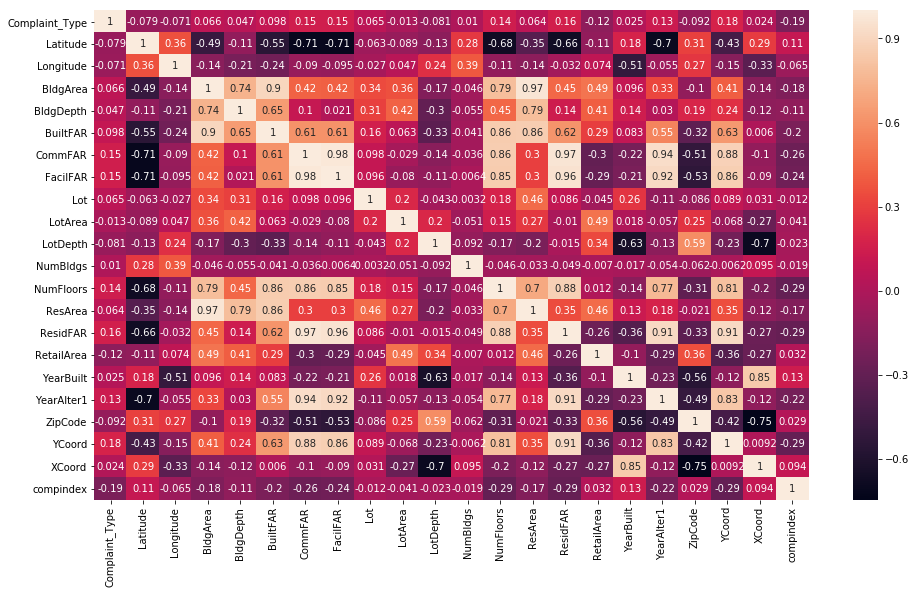

In [42]:
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
se.heatmap(BX_Heat.corr(),annot=True)

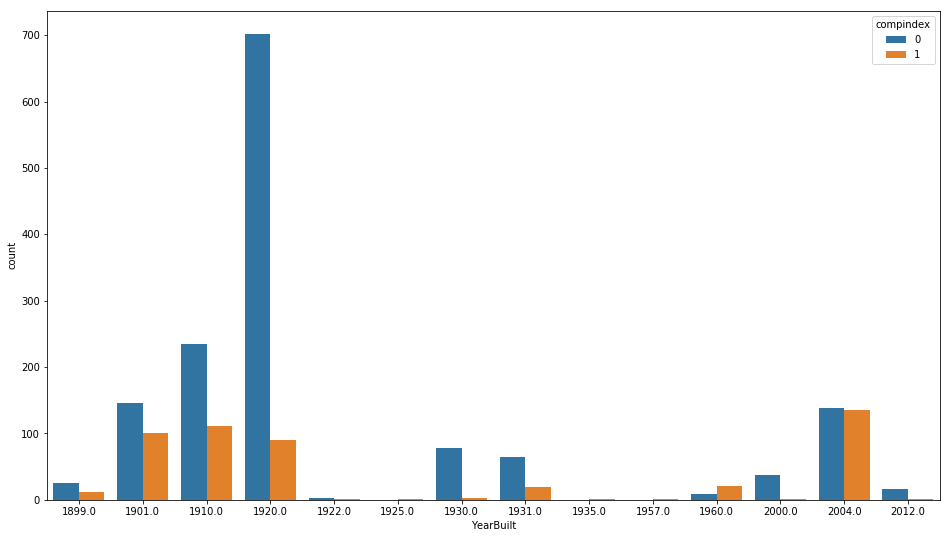

In [43]:
#mapping 2 series. Orange bar is Heating related complaints vs the age of the building. Bronx is the oldest borough in NYC.
plt.rcParams["figure.figsize"] = [16,9]
se.countplot(x='YearBuilt', hue='compindex', data=BX_Heat)

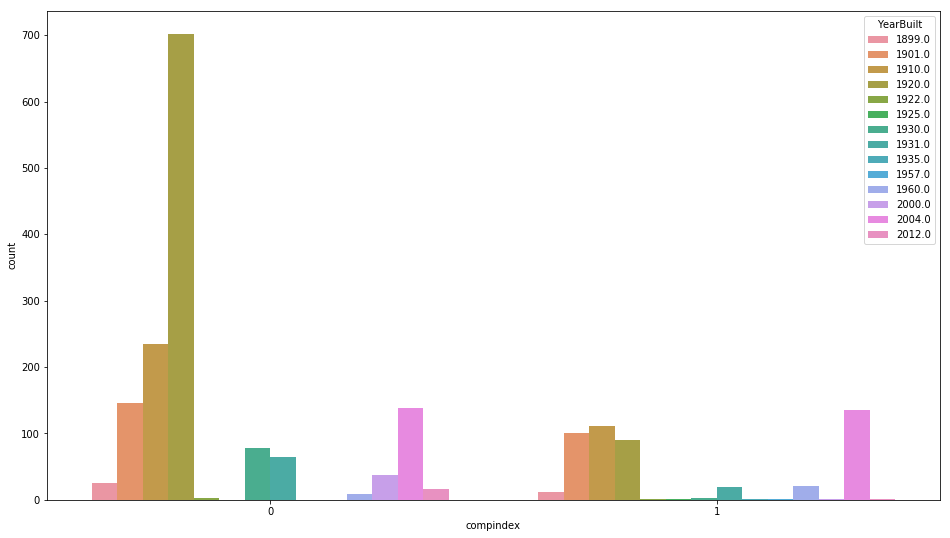

In [44]:
plt.rcParams["figure.figsize"] = [16,9]
se.countplot(x='compindex', hue='YearBuilt', data=BX_Heat)

In [45]:
#Univariate Statistical Tests. 
#select those features that have the strongest relationship with the output variable.

from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#Define feature set.
y = BX_Heat['compindex']
X = BX_Heat.drop(['compindex'], axis=1)

# feature extraction. ANOVA F-value method
test = SelectKBest(score_func=f_classif, k='all')
fit = test.fit(X, y)

#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)



NameError: name 'selector' is not defined

In [ ]:
#Feature selection

X = BX_Heat[['NumFloors', 'ResidFAR', 'CommFAR', 'FacilFAR', 'YearAlter1', 'BuiltFAR', 'BldgArea',
       'ResArea', 'YearBuilt', 'BldgDepth']]
X[0:5]

In [ ]:
y = BX_Heat['compindex'].values
y[0:5]

In [ ]:
#Normalize data
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

In [ ]:
# We split the X into train and test to find the best k. 80% train 20% test
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

In [ ]:
#KNN

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
yhat = neigh.predict(X_val)
print("KNN Accuracy at k = 5: ", metrics.accuracy_score(y_val, yhat))

In [ ]:
#Best accuracy.accuracy for the first 15 values of k the on the validation data
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_val)
    mean_acc[n-1] = metrics.accuracy_score(y_val, yhat)

    
    std_acc[n-1]=np.std(yhat==y_val)/np.sqrt(yhat.shape[0])
print(mean_acc)
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

BXTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
BXTree # it shows the default parameters
BXTree.fit(X_train,y_train)

predTree = BXTree.predict(X_val)
print (predTree [0:5])
print (y_val [0:5])

from sklearn import metrics
print("DecisionTrees's Accuracy at max_depth = 4: ", metrics.accuracy_score(y_val, predTree))



In [ ]:
#SVM

from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import jaccard_similarity_score
clf = svm.SVC(kernel='linear',gamma='auto')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_val)
jaccard_similarity_score(y_val, yhat)

clf1 = svm.SVC(kernel='poly',gamma='auto')
clf1.fit(X_train, y_train) 
yhat1 = clf1.predict(X_val)
jaccard_similarity_score(y_val, yhat1)

clf2 = svm.SVC(kernel='rbf',gamma='auto')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_val)
jaccard_similarity_score(y_val, yhat2)

clf2 = svm.SVC(kernel='sigmoid',gamma='auto')
clf2.fit(X_train, y_train) 
yhat3 = clf2.predict(X_val)
jaccard_similarity_score(y_val, yhat3)

print("Linear Accuracy: ", jaccard_similarity_score(y_val, yhat))
print("Polynomial Accuracy: ", jaccard_similarity_score(y_val, yhat1))
print("Radial Basis Function Accuracy: ", jaccard_similarity_score(y_val, yhat2))
print("Sigmoid Accuracy: ", jaccard_similarity_score(y_val, yhat3))

In [ ]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_val)
print("Accuracy: ", jaccard_similarity_score(y_val, yhat))

In [ ]:
#Evaluate Model using test set

from sklearn.metrics import f1_score
# for f1_score please set the average parameter to 'micro'
from sklearn.metrics import log_loss

def jaccard_index(predictions, true):
    if (len(predictions) == len(true)):
        intersect = 0;
        for x,y in zip(predictions, true):
            if (x == y):
                intersect += 1
        return intersect / (len(predictions) + len(true) - intersect)
    else:
        return -1
    
test_y = BX_Heat['compindex'].values
test_y[0:5]

In [ ]:
neigh = KNeighborsClassifier(n_neighbors = 5).fit(X_val,y_val)
yhat = neigh.predict(X_val)

print("F1 score:",f1_score(y_val, yhat, average='micro'))
print("Jaccard Index:",jaccard_index(yhat, y_val))



In [ ]:
from sklearn.metrics import classification_report

BXTree = DecisionTreeClassifier(criterion="entropy", max_depth = 1)
BXTree # it shows the default parameters
BXTree.fit(X_val,y_val)

predTree = BXTree.predict(X_val)

print("F1 score:",f1_score(y_val, predTree, average='micro'))
print("Jaccard Index:",jaccard_index(predTree, y_val))


In [ ]:
clf = svm.SVC(kernel='poly')
clf.fit(X_val,y_val)
yhat = clf.predict(X_val)
print("F1 score:",f1_score(y_val, yhat, average='micro'))
print("Jaccard Index:",jaccard_index(yhat, y_val))

In [ ]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_val,y_val)
yhat = LR.predict(X_val)
print("F1 score:",f1_score(y_val, yhat, average='micro'))
print("Jaccard Index:",jaccard_index(yhat, y_val))

In [ ]:
#actual labels
y_val[0:10]

In [ ]:
#predicted labels using LR
yhat[0:10]